# Introduction
---

<p>Name  : Hadyan Yusuf Imran</p>
<p>Batch : HCK-025</p>

<p>This program is designed to analyze the current house market prices in Melbourne and determine the most potential areas and segments as well as underperforming suburbs that need to be focused on to increase the percentage of house sales.</p>

<p>Link Dashboard: https://public.tableau.com/app/profile/hadyan.yusuf.imran/viz/MelbourneHouseSales_17393774299220/Dashboard1?publish=yes</p>
<p>Link Dataset: https://www.kaggle.com/datasets/amalab182/property-salesmelbourne-city</p>

# Business Understanding
---

## Topic
Analyze house sales data in the Melbourne City to increase the percentage of house sales.

## Background
Specific: Increase home sales through marketing strategies that are more focused on potential areas and adjust prices for house that are still underperforming to attract the interest of home buyers.

Measurable:
Increased home sales percentage from 4% to 10%.

Achievable:
- Conduct market price analysis based on each suburb and find out factors that influence prices such as number of rooms, land area and location to identify areas with positive growth trends.
- Adjust prices for house areas with low sales to attract potential buyers.

Relevant:
By knowing the most potential areas and segments, you can focus your marketing resources and sales efforts more efficiently. In addition, we can also see which house areas are still lagging behind, so we can focus on increasing sales. The overall increase in sales will have a positive impact on your business reputation and profitability in the house market.

Time-bound:
The target for increasing sales is set to be achieved in the next six months.


## Problem Statement
Increasing house sales through targeted marketing strategies is essential to attract potential buyers. The goal is to increase the percentage of house sales from 4% to 10% by focusing on identifying high-potential areas and adjusting the prices of house area that are currently underperforming. By focusing marketing resources and sales efforts on these segments, the potential for home sales can be increased. This targeted strategy will not only increase overall sales but also strengthen the reputation and profitability of the business in the house market and will be implemented over the next six months.

## Problem Breakdown
- Which region has the most and least home sales?
- What are the top 5 highest selling suburbs in the best-selling region?
- What is the average price in each region and which one have the most and least sales?
- How did total home sales compare in 2016 and 2017?
- Are the top 5 suburbs that sold in 2016 the same as 2017?
- How do house size, number of rooms, and distance to the CBD influence house prices?

# Data Exploration
---


<p>In this section I will explore all the data based on the CSV 'property-sales-of-melbourne-city.csv' to see the number of rows and columns, see if there are any missing values ​​and duplicate data, and match the data type whether it is suitable for analysis or not.</p>

In [157]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
# Read csv file and covert to dataframe
df = pd.read_csv('property-sales-of-melbourne-city.csv')

# Show 5 rows of data
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [159]:
# Check total missing value
print(f"Total missing value data: {df.isnull().sum().sum()}")

Total missing value data: 48212


In [160]:
# Check for missing value
df.isnull().sum()

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

In [161]:
# Check total duplicate data
print(f"Total duplicate data: {df.duplicated().sum()}")

Total duplicate data: 0


In [162]:
# Show datatype
df.dtypes

Unnamed: 0         int64
Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

<p>Date data type is still an object. It needs to be converted to date.</p>

<p>Here we can see that the data still have missing value of 48212 and the date data type is still an object instead of date, however we can also see that there is no duplicate data. 
For the analysis, we only need the house property data and there are some data that can be removed to make the analysis more focused such as the data 'Method', 'Postcode', 'CouncilArea', 'Lattitude', 'Longtitude', and 'Propertycount' are not needed in the analysis. Some columns also need to be rename for familiarity. This process will be carried out in the next data cleaning process.</p>

# Data Cleaning
---

<p>In this section, I will perform data cleaning processes such as removing all property types except houses, removing columns that are not related to the analysis, handling missing values, and changing unrelated data types and then putting them into a new csv so that they can be used for analysis.</p>

In [163]:
# Show information from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  int64  
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [164]:
# Drop all property 'Type' except house which is marked by 'h'
df = df.drop(df[df['Type'] != 'h'].index)

# Delete unused columns for analysis
df = df.drop(columns=['Unnamed: 0', 'Method', 'Postcode', 'CouncilArea', 'Lattitude', 'Longtitude', 'Propertycount'])

# Rename some columns to make it more familiar
df = df.rename(columns={'Bedroom2': 'Bedroom', 'SellerG': 'Seller', 'Regionname': 'Region'})

# Show information from data after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12095 entries, 0 to 18395
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        12095 non-null  object 
 1   Address       12095 non-null  object 
 2   Rooms         12095 non-null  int64  
 3   Type          12095 non-null  object 
 4   Price         12095 non-null  int64  
 5   Seller        12095 non-null  object 
 6   Date          12095 non-null  object 
 7   Distance      12095 non-null  float64
 8   Bedroom       10249 non-null  float64
 9   Bathroom      10248 non-null  float64
 10  Car           10151 non-null  float64
 11  Landsize      9462 non-null   float64
 12  BuildingArea  5237 non-null   float64
 13  YearBuilt     5810 non-null   float64
 14  Region        12095 non-null  object 
dtypes: float64(7), int64(2), object(6)
memory usage: 1.5+ MB


In [165]:
# Handling missing values
df = df.dropna(subset=['Distance', 'Bedroom', 'Bathroom', 'Landsize', 'BuildingArea']) # Delete rows that have missing values ​​for data accuracy

# Check for missing values after cleaning
df.isnull().sum()

Suburb            0
Address           0
Rooms             0
Type              0
Price             0
Seller            0
Date              0
Distance          0
Bedroom           0
Bathroom          0
Car              28
Landsize          0
BuildingArea      0
YearBuilt       173
Region            0
dtype: int64

In [166]:
# Handling missing values for 'Car' and 'YearBuilt'
df = df.fillna({'Car': 0, 'YearBuilt': 0}) # Replacing missing value data with 0 to avoid missing value

# Check for missing value after cleaning
df.isnull().sum()

Suburb          0
Address         0
Rooms           0
Type            0
Price           0
Seller          0
Date            0
Distance        0
Bedroom         0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
Region          0
dtype: int64

In [167]:
# Show total missing value
print(f"Total missing value data: {df.isnull().sum().sum()}")

Total missing value data: 0


In [168]:
# Change date data type from string to date
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
print(f"Date data type after cleaning: {df['Date'].dtypes}")

Date data type after cleaning: datetime64[ns]


In [169]:
# Show total data after cleaning
print("Total data:", df.shape[0])

Total data: 4863


In [170]:
# Input clean data to new CSV
df.to_csv('house-sales-of-melbourne-city_cleaned.csv', index=False)

# Analysis
---

<p>In this section, we will conduct a data analysis process from house sales in Melbourne in order to solve the problems that have been identified and provide insights for real estate agents to increase their home sales.</p>

In [171]:
# Read csv file and covert to dataframe
house_data = pd.read_csv('property-sales-of-melbourne-city.csv')

## Which region has the most and least home sales?

In [172]:
# Count total home sales by each region and sort it descending
region_house_sales = df.groupby('Region')['Price'].count().reset_index().sort_values('Price', ascending=False).reset_index(drop=True)
region_house_sales

,Region,Price
0,Southern Metropolitan,1411
1,Northern Metropolitan,1407
2,Western Metropolitan,1211
3,Eastern Metropolitan,569
4,South-Eastern Metropolitan,187
5,Eastern Victoria,29
6,Northern Victoria,28
7,Western Victoria,21


In [173]:
# Calculate the total number of sales for each region
total_sales_southern_metro = region_house_sales.iloc[0]['Price']
total_sales_western_vic = region_house_sales.iloc[7]['Price']

# Calculate the ratio of sales in Western Victoria to Southern Metropolitan
ratio = total_sales_western_vic / total_sales_southern_metro

# Convert the ratio to percentage
ratio_percent = ratio * 100

# Show the percentage comparison between Western Victoria and Metropolitan South
print("The difference between Western Victoria and Southern Metropolitan is {:.2f}%".format(ratio_percent))

The difference between Western Victoria and Southern Metropolitan is 1.49%


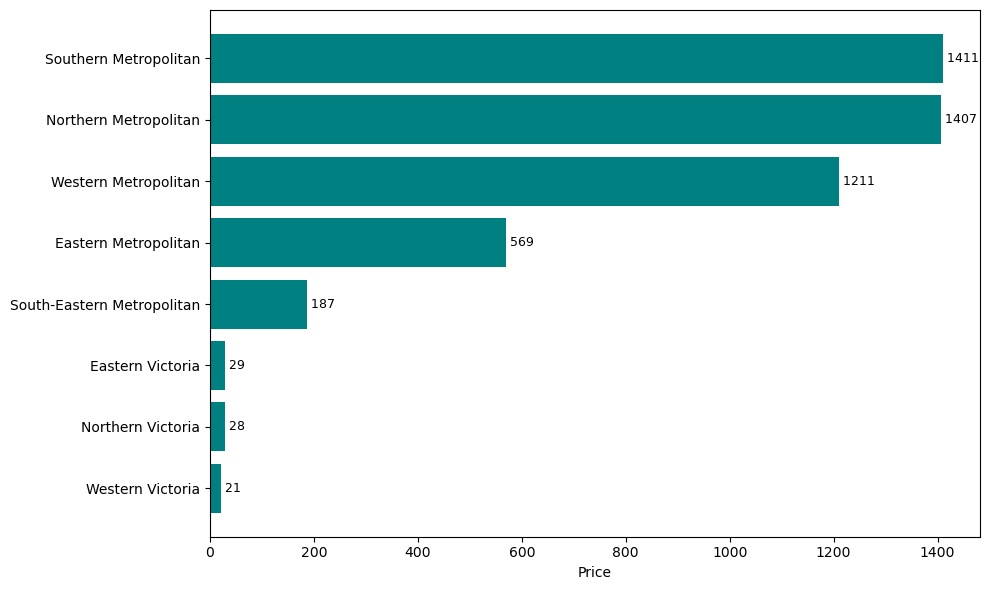

In [174]:
# Creating horizontal bar chart
plt.figure(figsize=(10, 6))
plt.gca().invert_yaxis()
bars = plt.barh(region_house_sales['Region'], region_house_sales['Price'], color='teal')

# Add text annotations
for i, price in enumerate(region_house_sales['Price']):
    plt.text(price, i, f' {price}', va='center', ha='left', fontsize=9)

# Show Chart
plt.xlabel('Price')
plt.tight_layout()
plt.show()

From the chart we can conclude:
- South and North Metropolitan have the highest total home sales with a total of 2,818 homes sold indicating that there is high demand in the Metropolitan Area.
- There is a huge gap in home sales between metropolitan and non-metropolitan areas, with home sales in Western Victoria only 1.49% of Southern Metropolitan sales.

Insight for Real Estate Agent:
- There are high demands in Metropolitan areas, and need better marketing strategy to sell house in Non Metropolitan areas.
- The East and Southeast Metropolitan areas sell less compared to other Metropolitan areas which is a great opportunity for agents to market to homebuyers who want to live in less crowded Metropolitan Areas.

## What are the top 5 highest selling suburbs in the best-selling region?

In [175]:
# Filter data for the region “Southern Metropolitan”
southern_metropolitan = df[df['Region'] == 'Southern Metropolitan']

# Count each house sales in each suburbs with sort descending
top_5_highest_suburbs_southmetro = southern_metropolitan.groupby('Suburb')['Price'].count().reset_index(name='House Sales').sort_values('House Sales', ascending=False).head(5)

# Show top 5 highest selling suburbs in Southern Metropolitan
top_5_highest_suburbs_southmetro

,Suburb,House Sales
9,Bentleigh East,85
6,Balwyn North,75
27,Glen Iris,69
35,Kew,56
12,Brighton East,56


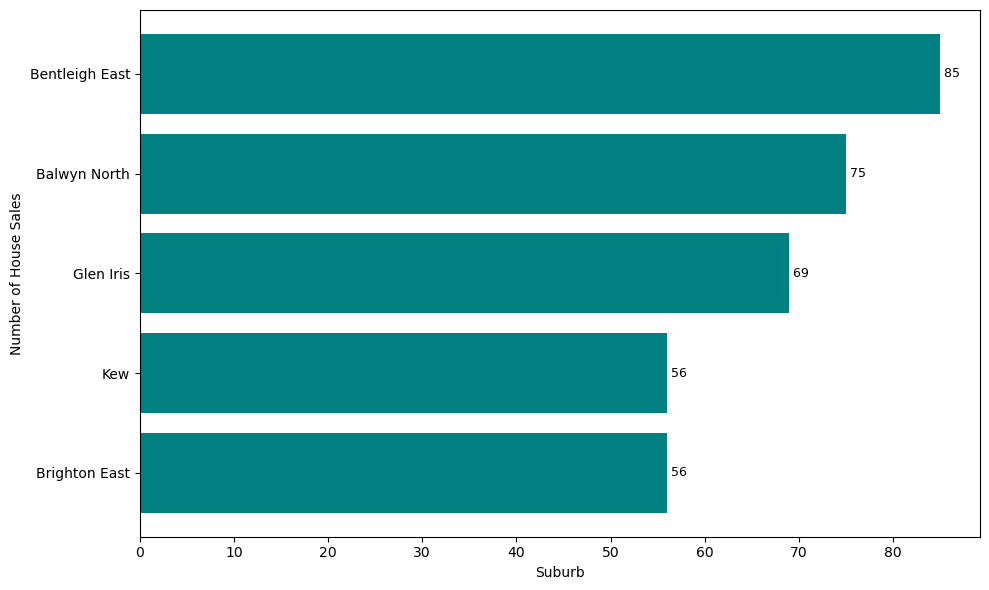

In [ ]:
# Create a bar chart to visualize the data
plt.figure(figsize=(10, 6))
plt.gca().invert_yaxis()
plt.barh(top_5_highest_suburbs_southmetro['Suburb'], top_5_highest_suburbs_southmetro['House Sales'], color='teal')

# Add text annotations
for i, sales in enumerate(top_5_highest_suburbs_southmetro['House Sales']):
    formatted_text = sales
    plt.text(sales, i, f' {formatted_text}', va='center', ha='left', fontsize=9)

# Show chart
plt.xlabel('Suburb')
plt.ylabel('Number of House Sales')
plt.title('Top 5 Highest Selling Suburbs in Southern Metropolitan')
plt.tight_layout()
plt.show()

From the chart we can conclude:
- With 85 homes sold, Bentleigh East was the suburb with the highest number of transactions in the region.
- Kew and Brighton East have similar sales figures, indicating that demand in these two areas is relatively stable and quite high.

Insight for Real Estate Agent:
- With the highest number of sales, Bentleigh East may have high Investment Potential and could boost house prices in the future.
- Competition in the Suburbs is very healthy due to Similar Sales

## What is the average price in each region and which one have the most and least sales?

In [177]:
# Find the average selling prices from each region by grouping 'Region' columns, find the average, and sort it descending
average_region_price = df.groupby('Region')['Price'].mean().reset_index().sort_values('Price', ascending=False).reset_index(drop=True).round(2)
average_region_price

,Region,Price
0,Southern Metropolitan,1864723.79
1,Eastern Metropolitan,1205951.03
2,Northern Metropolitan,1012709.26
3,Western Metropolitan,970528.12
4,South-Eastern Metropolitan,969209.37
5,Eastern Victoria,697033.86
6,Northern Victoria,600357.14
7,Western Victoria,407761.90


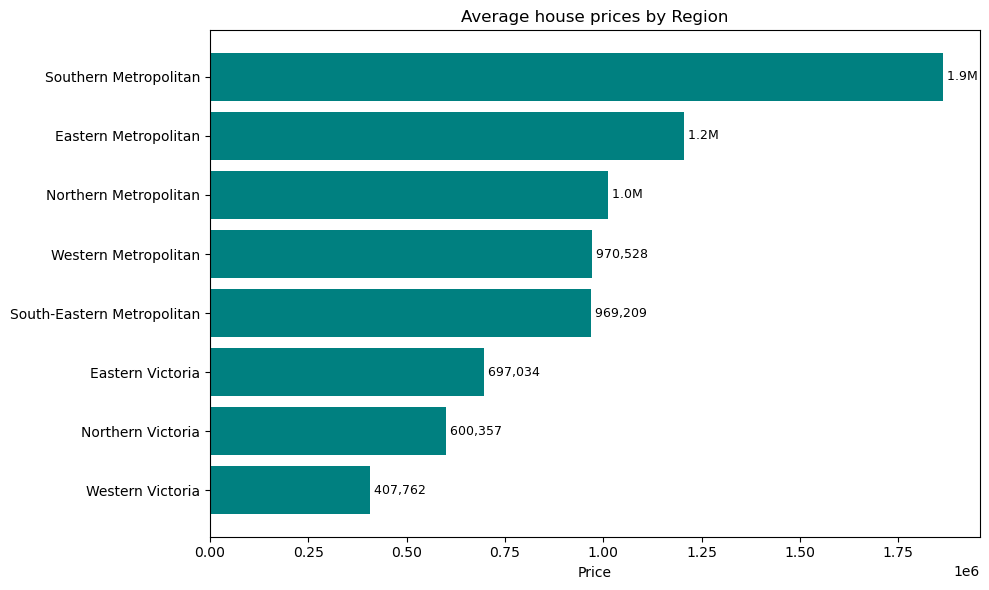

In [178]:
# Format Price Function
"""
This function is to replace value that is greater than billion and million with word B and M.

Example:
If price = 1000000 then
the output = 1.0M
"""
def format_price(price):
    if price > 1000000000:
        # Convert prices for values ​​greater than 1 Billion by adding word B to the end of the price
        return f"{price / 1000000000:.1f}B"
    elif price > 1000000:
        # Convert prices for values ​​greater than 1 Million by adding word M to the end of the price
        return f"{price / 1000000:.1f}M"
    else:
        return f"{price:,.0f}" # Convert the number with thousands separator and no decimal places

# Creating horizontal bar chart
plt.figure(figsize=(10, 6))
plt.gca().invert_yaxis()
bars = plt.barh(average_region_price['Region'], average_region_price['Price'], color='teal')

# Add text annotations
for i, price in enumerate(average_region_price['Price']):
    formatted_text = format_price(price)
    plt.text(price, i, f' {formatted_text}', va='center', ha='left', fontsize=9)

# Show chart
plt.xlabel('Price')
plt.title('Average house prices by Region')
plt.tight_layout()
plt.show()

From the chart we can conclude:

- Southern Metropolitan has the highest house prices with the average house prices around $1.9 million, it is the most expensive area compared to other areas.
- The top five areas are all metropolitan areas which concludes that Metropolitan areas tend to have higher prices.
- Western Victoria has the lowest house prices compare to others with the average house price around $407.762.
- Significant price gap between metropolitan and non-metropolitan areas. Southern Metropolitan house prices are almost five times higher than Western Victoria.

Insight for Real Estate Agent:
- For Metropolitan areas target buyers with high purchasing power such as successful entrepreneurs or CEOs of a company.
- For Non-Metropolitan areas, prices are more affordable and suitable for first-time buyers or young families.


## How did total home sales compare in 2016 and 2017?

In [179]:
# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Count total sales for 2016 and 2017
sales_2016 = df[df['Year'] == 2016].shape[0]
sales_2017 = df[df['Year'] == 2017].shape[0]

# Print the results
print("Total home sales in 2016:", sales_2016)
print("Total home sales in 2017:", sales_2017)

# Calculate the percentage change from 2016 to 2017
percentage_change = ((sales_2017 - sales_2016) / sales_2016) * 100
print("Percentage change from 2016 to 2017: {:.2f}%".format(percentage_change))

Total home sales in 2016: 2383
Total home sales in 2017: 2480
Percentage change from 2016 to 2017: 4.07%


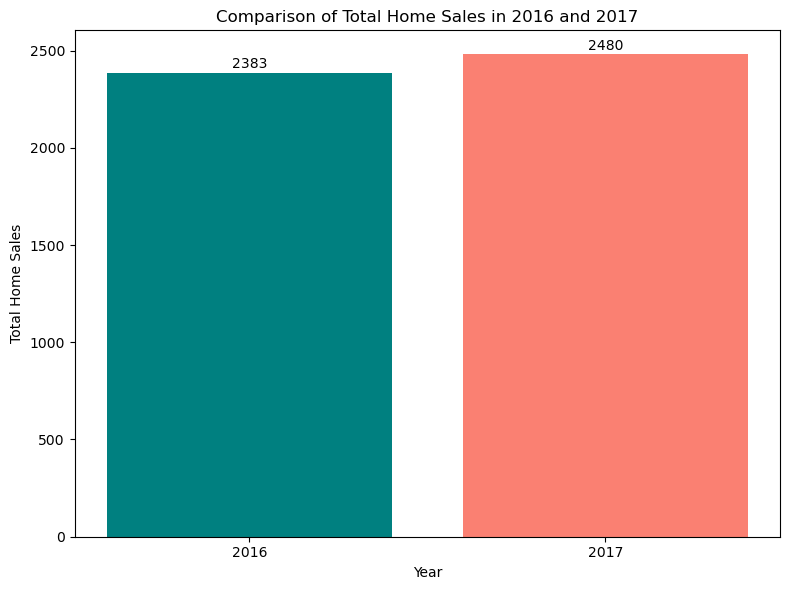

In [180]:
# Prepare data for visualization
years = ['2016', '2017']
sales_counts = [sales_2016, sales_2017]

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(years, sales_counts, color=['teal', 'salmon'])

# Add text annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 10, f'{int(yval)}', 
             ha='center', va='bottom', fontsize=10)

# Show chart
plt.xlabel('Year')
plt.ylabel('Total Home Sales')
plt.title('Comparison of Total Home Sales in 2016 and 2017')
plt.tight_layout()
plt.show()

From the chart we can conclude:
- This increase in sales indicates that demand for house in Melbourne increased from 2016 to 2017.
- The increase of 4.07% indicates a steady growth in the property market.

Insight for Real Estate Agent:
- Positive Trends in the Melbourne Property Market indicate that there is great potential to develop more residential projects in Melbourne.
- If this trend continues, house prices may also increase, indicating good business potential for real estate agents.

## Are the top 5 suburbs that sold in 2016 the same as 2017?

In [181]:
# Get top 5 selling suburbs for 2016
top5_2016 = (df[df['Year'] == 2016].groupby('Suburb').size().reset_index(name='Sales').sort_values('Sales', ascending=False).head(5))
suburbs_2016 = top5_2016['Suburb'].tolist()

# Get top 5 selling suburbs for 2017
top5_2017 = (df[df['Year'] == 2017].groupby('Suburb').size().reset_index(name='Sales').sort_values('Sales', ascending=False).head(5))
suburbs_2017 = top5_2017['Suburb'].tolist()

# Display the top 5 suburbs for each year
print("Top 5 Suburbs in 2016:", suburbs_2016)
print("Top 5 Suburbs in 2017:", suburbs_2017)

Top 5 Suburbs in 2016: ['Richmond', 'Reservoir', 'Bentleigh East', 'Preston', 'Brunswick']
Top 5 Suburbs in 2017: ['Reservoir', 'Preston', 'Brunswick', 'Yarraville', 'Coburg']


The findings above show that there was a change in the top 5 suburbs from 2016 to 2017.

Analysis:
- The suburbs that remained in the top 5 list in both years are Reservoir, Preston, Brunswick indicating that these three suburbs have high and sustained housing demand.
- Richmond and Bentleigh East are out from the top 5 list replaced with Yarraville and Coburg

Insight:
- Reservoir, Preston and Brunswick are reliable areas for long-term investment as they remain in high demand.
- Expanding development in up-and-coming suburbs such as Yarraville and Coburg could be a profitable strategy.

## How do house size, number of rooms, and distance to the CBD influence house prices?

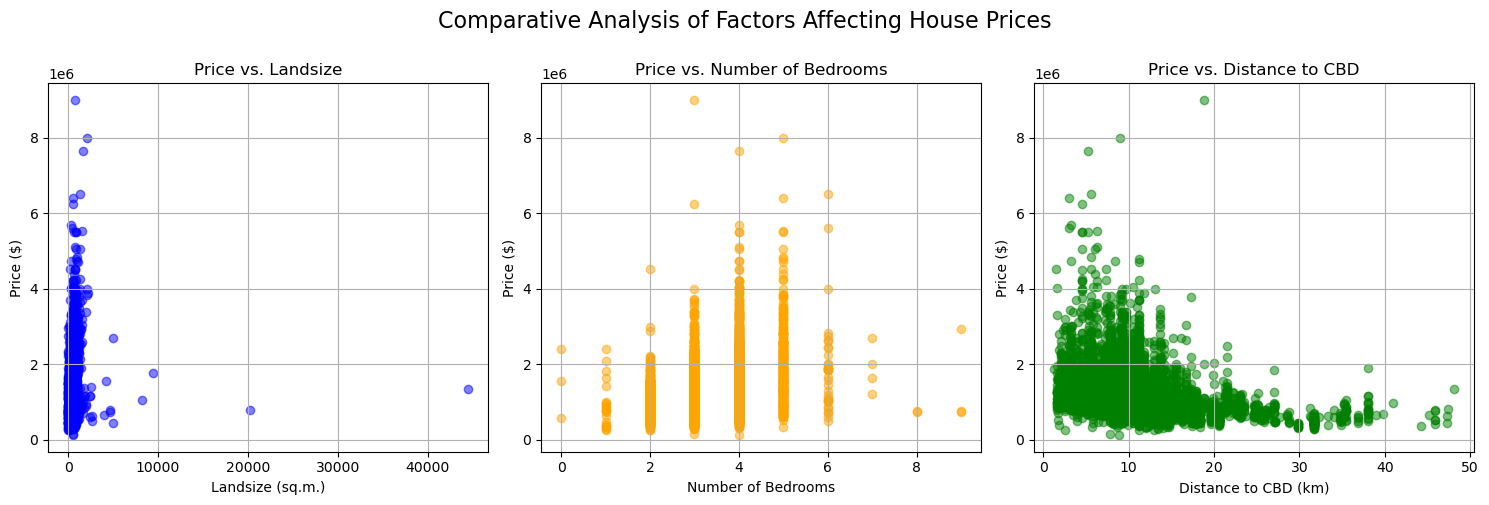

In [182]:
# Create a figure with a size that allows for clear visualization of three plots side-by-side
plt.figure(figsize=(15, 5))

# Plot 1: Price vs. Landsize (as a proxy for house size)
plt.subplot(1, 3, 1)
plt.scatter(df['Landsize'], df['Price'], alpha=0.5, color='blue')
plt.title('Price vs. Landsize')
plt.xlabel('Landsize (sq.m.)')
plt.ylabel('Price ($)')
plt.grid(True)

# Plot 2: Price vs. Number of Bedrooms
plt.subplot(1, 3, 2)
plt.scatter(df['Bedroom'], df['Price'], alpha=0.5, color='orange')
plt.title('Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.grid(True)

# Plot 3: Price vs. Distance to CBD
plt.subplot(1, 3, 3)
plt.scatter(df['Distance'], df['Price'], alpha=0.5, color='green')
plt.title('Price vs. Distance to CBD')
plt.xlabel('Distance to CBD (km)')
plt.ylabel('Price ($)')
plt.grid(True)

# Add a super title for the entire figure to explain the overall comparison
plt.suptitle('Comparative Analysis of Factors Affecting House Prices', fontsize=16, y=1)

# Adjust layout to ensure nothing overlaps
plt.tight_layout()
plt.show()

Price vs. Landsize Analysis: 
- Highly concentrated distribution in small areas
- Some outliers show very large plots (above 10,000 m²) with varying prices.

Price vs. Landsize Insight:
- Landsize is not the main factor that determines the price of a house as it can be seen that similar size houses can have varying prices.

Price vs. Number of Bedrooms Analysis: 
- House prices tend to increase with the number of bedrooms, but this relationship is not always linear as prices are also quite variable.

Price vs. Landsize Insight:
- The number of bedrooms affects the price, but not always proportionally.

Price vs. Distance to CBD Analysis: 
- Housing prices are higher in areas close to the city center (CBD).
- Many very high-priced homes (above $4 million) are within a radius of about 10-15 km from the CBD.

Price vs. Distance to CBD Insight:
- Distance to the CBD is a major factor in determining house prices.
- The further away from the CBD, house prices tend to be cheaper, except for exclusive properties in certain suburban locations.

# Conclusion

<p>From the analysis results, it can be seen that the potential for property business development in Melbourne City has a positive trend, as seen from the comparison of total home sales from 2016 which increased by 4% compared to 2017. The data also provides information that properties with larger sizes and locations closer to the CBD tend to have higher selling prices. This explains why the Metropolitan area, especially Southern Metropolitan, has a very high selling price compared to non-Metropolitan areas, especially Western Victoria.</p>

## Insight
<p>
Knowing the most sought-after areas such as Metropolitan South and its top 5 suburbs (Reservoir, Preston, Brunswick, Yarraville, Coburg) can give real estate agents insights to focus their marketing resources and sales efforts more efficiently on these spots.
- We can also focus on changing marketing strategy techniques for Western Victoria which is the region with the lowest sales among all regions so that this residential region can become as attractive as the metropolitan region.
</p>

<p>So, if you want to increase home sales percentage from 4% to 10%., I suggest you to focus on these two insight which is focusing on Highest Region sales and create new and better strategy for Lowest Region Sales and Suburbs. Following these two insight will increase the profit and the overall increase in sales will have a positive impact on your business reputation and profitability in the house market.</p>